<a href="https://colab.research.google.com/github/jdasam/aat3020-2023/blob/main/notebooks/4_Machine_translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Translation

In [1]:
# install HuggingFace
!pip install transformers tokenizers

# If you are not using Colab, install below to read xlsx file
# !pip install openpyxl

In [2]:
'''
Download dataset (originally from NIA AI-Hub)
'''

# !gdown 1CpsqOuuuB3I_PG5DbuqH1ssCFVerU46g
# !unzip -q nia-aihub-korean-english.zip

# !gdown 1GMFWREWBVcD5vJdwNFadHmzVStclcyKf
# !unzip -q nia-aihub-korean-english-txt.zip

!gdown 13CGLEULYccogSLByHXPAxSveLZTtnj8c
!unzip -q nia_korean_english_csv.zip

Downloading...
From (original): https://drive.google.com/uc?id=13CGLEULYccogSLByHXPAxSveLZTtnj8c
From (redirected): https://drive.google.com/uc?id=13CGLEULYccogSLByHXPAxSveLZTtnj8c&confirm=t&uuid=b8c59033-1e4d-4d26-a8ec-d1d86b36a244
To: /content/nia_korean_english_csv.zip
100% 190M/190M [00:04<00:00, 38.4MB/s]


In [3]:
from pathlib import Path
import pandas as pd

df = pd.read_csv("nia_korean_english.csv")

In [5]:
df

,원문,번역문
0,'Bible Coloring'은 성경의 아름다운 이야기를 체험 할 수 있는 컬러링 ...,Bible Coloring' is a coloring application that...
1,씨티은행에서 일하세요?,Do you work at a City bank?
2,푸리토의 베스트셀러는 해외에서 입소문만으로 4차 완판을 기록하였다.,"PURITO's bestseller, which recorded 4th rough ..."
3,11장에서는 예수님이 이번엔 나사로를 무덤에서 불러내어 죽은 자 가운데서 살리셨습니다.,In Chapter 11 Jesus called Lazarus from the to...
4,"6.5, 7, 8 사이즈가 몇 개나 더 재입고 될지 제게 알려주시면 감사하겠습니다.",I would feel grateful to know how many stocks ...
...,...,...
1602413,힐튼호텔 건너편에서 회현동주민센터로 내려가는 길에는 칙칙한 회색의 석축옹벽이 이어져...,"Across from the Hilton Hotel, the path to Hoeh..."
1602414,힘든 분들이 많이 계시지만 조금이나마 어렵지 않도록 도움이 될 수 있도록 저희가 최...,There are a lot of people who are having a har...
1602415,힘든 역사 속에서 대한민국을 불과 50여년 만에 빛나는 나라로 만들고 업적을 만들 ...,It was possible to make the Republic of Korea ...
1602416,힘든 일을 하는 데는 무엇보다 정부가 큰 관심을 갖고 있다는 자부심을 갖도록 해야 한다.,"As for doing hard work, most of all, they shou..."


In [ ]:
# You don't have to run this
'''
dataset_dir = Path('nia_korean_english')
data_list = sorted(list(dataset_dir.glob('*.xlsx')))
for path in data_list:
  df = pd.read_excel(path)
  kor_text_path = path.parent / (path.stem+'_kor.txt')
  eng_text_path = path.parent / (path.stem+'_eng.txt')
  with open(kor_text_path, 'w', encoding='utf8') as f:
      f.write('\n'.join(df['원문']))
  with open(eng_text_path, 'w', encoding='utf8') as f:
      f.write('\n'.join(df['번역문']))
'''


"\ndataset_dir = Path('nia_korean_english')\ndata_list = sorted(list(dataset_dir.glob('*.xlsx')))\nfor path in data_list:\n  df = pd.read_excel(path)\n  kor_text_path = path.parent / (path.stem+'_kor.txt') \n  eng_text_path = path.parent / (path.stem+'_eng.txt') \n  with open(kor_text_path, 'w', encoding='utf8') as f:\n      f.write('\n'.join(df['원문']))\n  with open(eng_text_path, 'w', encoding='utf8') as f:\n      f.write('\n'.join(df['번역문']))\n"

In [6]:
df['원문'][10000:10050], df['번역문'][10000:10050]

(10000          개, 돌고래류, 원숭이, 앵무새 일련의 음성 명령 또는 단어를 배울 수 있다.
 10001                     개가 계속 딸꾹질을 한다면 문제가 있는 것이 틀림없습니다.
 10002                                      개가 그걸 좋아할 것 같아.
 10003                                      개가 정말 예쁘게 생겼네요.
 10004                            개가 지저분하게 해 놓은 것을 청소할 거예요.
 10005                           개가 짖는 소리 때문에 나는 방금 잠에서 깼어.
 10006    개가 하는 행동의 의미를 알고 있는 것은 반려견과 서로를 이해할 수 있는 하나의 방...
 10007         개개인들이 가까이 서로 붙어있으면, 그들은 서로 소통하고 많은 정보를 나눕니다.
 10008    개개인의 사망 시점을 예측하기는 어려워도 어느 집단에서 일정 기간의 평균 사망자 수...
 10009      개개인의 존재가 존중된 후에 제대로 된 society가 이루어질 수 있다고 생각해요.
 10010    개교 이래 100년 만에 DJ들과 빠른 비트의 EDM 음악, 현란한 조명들은 저에게...
 10011                     개구리는 뱀이 개구리를 먹는다는 것을 알고 어떻게 했나요?
 10012                         개구리로 변한 그는 사람들로부터 괴롭힘을 당했어요.
 10013    개구쟁이 성격을 지닌 캐릭터로 연령대가 10대 후반에서 20대 초반으로 사춘기를 겪...
 10014                 개구쟁이처럼만 지낼 것 같아서 걱정이었는데 사진 보니 자랑스러워.
 10015                                개국 기념일 날에는 불꾳 놀이를 해요.
 10016         개나 소나 말고, 보고 싶은 것만 보고 보여주

## Huggingface Tokenizer

In [ ]:
'''
from tokenizers import BertWordPieceTokenizer
tokenizer = BertWordPieceTokenizer(strip_accents=False, lowercase=False)

num_files = len(data_list)

corpus_file   =  [str(path.parent / (path.stem + '_kor.txt')) for path in data_list[:num_files]]
# output_dir   = Path('hugging_kor_%d'%(vocab_size))
en_corpus_file   =  [str(path.parent / (path.stem + '_eng.txt')) for path in data_list[:num_files]]
# output_dir   = Path('hugging_eng_%d'%(vocab_size))

vocab_size    = 32000  # Number of maximum size of the vocabulary
limit_alphabet= 6000
output_dir    = Path('hugging_kor_%d'%(vocab_size))
en_output_dir = Path('hugging_eng_%d'%(vocab_size))
output_dir.mkdir(exist_ok=True)
en_output_dir.mkdir(exist_ok=True)
min_frequency = 5

tokenizer.train(files=corpus_file,
               vocab_size=vocab_size,
               min_frequency=min_frequency,
               limit_alphabet=limit_alphabet,
               show_progress=True)

tokenizer.save_model(str(output_dir))

en_tokenizer = BertWordPieceTokenizer(strip_accents=False, lowercase=False)
en_tokenizer.train(files=en_corpus_file,
                vocab_size=vocab_size,
                min_frequency=min_frequency,
                limit_alphabet=limit_alphabet,
                show_progress=True)
en_tokenizer.save_model(str(en_output_dir))

'''

['hugging_eng_32000/vocab.txt']

In [4]:
from transformers import BertTokenizerFast

tokenizer_src = BertTokenizerFast.from_pretrained('hugging_kor_32000',
                                                       strip_accents=False,
                                                       lowercase=False)
tokenizer_tgt = BertTokenizerFast.from_pretrained('hugging_eng_32000',
                                                       strip_accents=False,
                                                       lowercase=False)

tokenized_data = tokenizer_src(df['원문'].iloc[10])
print(tokenized_data['input_ids'])
print(df['원문'].iloc[10])
print(tokenizer_src.decode(tokenized_data['input_ids']))

[2, 6481, 21612, 2284, 22271, 6668, 9187, 8671, 4381, 3651, 7637, 17535, 18, 3]
나는 친구에게 그 철학자의 책을 선물해 주겠다고 말했습니다.
[CLS] 나는 친구에게 그 철학자의 책을 선물해 주겠다고 말했습니다. [SEP]


In [17]:
tokenized_data.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [15]:
tokenized_data['input_ids']

[2, 6481, 21612, 2284, 22271, 6668, 9187, 8671, 4381, 3651, 7637, 17535, 18, 3]

In [18]:
tokenized_data['attention_mask']

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [20]:
tokenized_ids = tokenizer_src(["나는 서강대학교에 다닙니다", "나는 3년전부터 서강대학교에 다닙니다"])['input_ids']
tokenized_ids

[[2, 6481, 25257, 8055, 4330, 2537, 10839, 3],
 [2, 6481, 8199, 21093, 25257, 8055, 4330, 2537, 10839, 3]]

In [22]:
tokenizer_src(["나는 서강대학교에 다닙니다", "나는 3년전부터 서강대학교에 다닙니다"])['attention_mask']


[[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

In [ ]:
tokenizer_src.decode(tokenized_ids)

'[CLS] 나는 서강대학교에 다닙니다 [SEP]'

## Divide Train / Validate/ Test Set
- using `np.random.choice`
    - To always get the same random shuffling result, you have to use `np.random.seed()`

In [5]:
import numpy as np
np.random.choice(list(range(len(df))), size=3, replace=False)

array([1587948,  230527,  823061])

In [6]:
num_entire_samples = int(len(df) * 0.01)
num_train_samples = int(num_entire_samples * 0.8)  # 6:2:2, 8:1:1
num_valid_samples = int(num_entire_samples * 0.1)
# num_test_samples = int(num_entire_samples * 0.1)

np.random.seed(0) # fix the random seed
randomized_indices = np.random.choice(list(range(len(df))), size=num_entire_samples, replace=False)
print(randomized_indices)
train_indices = randomized_indices[:num_train_samples]
valid_indices = randomized_indices[num_train_samples:num_train_samples+num_valid_samples]
test_indices = randomized_indices[num_train_samples+num_valid_samples:]

[ 778893 1467070  749733 ... 1403417 1118897  525934]


In [7]:
train_df = df.iloc[train_indices] # filter dataframe by sample indices
train_df

,원문,번역문
778893,"키스를 하려는 순간, 저 멀리서 싸움이 벌어지는 소리가 들려왔다.","The moment we were about to kiss, I heard a fi..."
1467070,구청장은 체육시설을 사용하고자 하는 자가 둘 이상 경합할 때에는 다음 각호의 순위에...,When two or more persons who intend to use a s...
749733,메이스가 부진해도 이길 수 있다는 가능성을 봤다.,I saw the possibility that they could win even...
1202387,두 회사가 제휴해 선보인 ‘신한-토스 CMA’는 20∼30대 사이에서 인기를 끌며 ...,"The ""Shinhan-Toss CMA,"" showed by the between ..."
1057201,2000년 이후 CS에서 7차전을 치른 팀과 그 전에 끝난 팀간 5차례 경기에서 쉽...,It was only the Philadelphia Phillies in 2008 ...
...,...,...
213471,재정적인 문제는 없으신가요?,Do you have any problem with your finances?
1301214,‘드루킹’ 불법댓글 조작 사건 수사를 맡은 허익범(59·사법연수원 13기) 특검팀에...,The independent counsel team led by Huh Ik-bum...
1545287,"매월 둘째 주 토요일 오전 11시부터 14시까지는 영유아를 위한 율동체조, 영유아 ...",From 11 to 14 O'Clock on the second Saturday o...
53627,나는 신경질적으로 미친 듯이 웃어대기 시작했어요.,I started laughing nervously and crazily.


## Define Dataset
- Each datasample has to return source sentence and target sentence
- You need a Tokenizer to get the tokenized result


In [8]:
import torch

class Dataset:
  def __init__(self, df, src_tokenizer, tgt_tokenizer):
    self.data = df
    self.src_tokenizer = src_tokenizer
    self.tgt_tokenizer = tgt_tokenizer

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    # get the idx-th sentence pair
    pair = self.data.iloc[idx]
    src_sentence = pair['원문']
    tgt_sentence = pair['번역문']

    src_token_ids = self.src_tokenizer(src_sentence)['input_ids']
    tgt_token_idx = self.tgt_tokenizer(tgt_sentence)['input_ids']

    # convert them to torch.LongTensor

    return torch.LongTensor(src_token_ids), torch.LongTensor(tgt_token_idx)

trainset = Dataset(train_df, tokenizer_src, tokenizer_tgt)
print(len(trainset))
trainset[0]

12819


(tensor([    2, 30329,  4416, 21091,  8488,    16,  3600, 12590,  4384, 27730,
         17247, 13085, 11828,  6854,    18,     3]),
 tensor([    2,  1023,  3800,  1287,  1266,  1350,  1042, 13046,    16,    77,
          3729,    69,  4585,  2180,  1068,  1039,  1023,  5928,    18,     3]))

## Define Model for Batch Size 1

In [9]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size=1)
batch = next(iter(train_loader))
print(batch)

src, tgt = batch

[tensor([[    2, 30329,  4416, 21091,  8488,    16,  3600, 12590,  4384, 27730,
         17247, 13085, 11828,  6854,    18,     3]]), tensor([[    2,  1023,  3800,  1287,  1266,  1350,  1042, 13046,    16,    77,
          3729,    69,  4585,  2180,  1068,  1039,  1023,  5928,    18,     3]])]


In [65]:
tokenizer_src.vocab_size

32000

In [71]:
import torch.nn as nn
from torch.nn.utils.rnn import PackedSequence

class Translator(nn.Module):
  def __init__(self, src_vocab_size, tgt_vocab_size, hidden_dim=32):
    super().__init__()

    # define the token ßembedding layer
    self.src_embedding = nn.Embedding(src_vocab_size, hidden_dim)
    self.encoder = nn.GRU(input_size=hidden_dim, hidden_size=hidden_dim, batch_first=True, num_layers=2)
    # if batch_first=False (default)
    # RNN considers input as T x N x C
    # if bathc_first=True
    # RNN considers input as N x T x C

    self.tgt_embedding = nn.Embedding(tgt_vocab_size, hidden_dim)
    self.decoder = nn.GRU(input_size=hidden_dim, hidden_size=hidden_dim, batch_first=True, num_layers=2)
    self.proj = nn.Linear(in_features=hidden_dim, out_features=tgt_vocab_size)

  def forward(self, src_sentence, tgt_sentence):
    if isinstance(src_sentence, PackedSequence):
      src_emb = self.src_embedding(src_sentence.data)
      src_emb = PackedSequence(data=src_emb, batch_sizes=src_sentence.batch_sizes,
                               sorted_indices=src_sentence.sorted_indices, unsorted_indices=src_sentence.unsorted_indices)
      tgt_emb = self.tgt_embedding(tgt_sentence.data)
      tgt_emb = PackedSequence(tgt_emb, tgt_sentence[1], tgt_sentence[2], tgt_sentence[3])
    else:
      src_emb = self.src_embedding(src_sentence)
      tgt_emb = self.tgt_embedding(tgt_sentence)
    encoder_out, enc_last_hidden = self.encoder(src_emb) # GRU returns two output: hidden_state_for_every_t, last_hidden


    decoder_out, dec_last_hidden = self.decoder(tgt_emb, enc_last_hidden) # feed encoder's last hidden state as decoder's initial hidden state

    # print(src_sentence.shape, src_emb.shape, encoder_out.shape, enc_last_hidden.shape)
    # print(tgt_emb.shape, decoder_out.shape, dec_last_hidden.shape)
    if isinstance(decoder_out, PackedSequence):
      return self.proj(decoder_out.data)
    else:
      return self.proj(decoder_out) # return logit, instead of softmax

model = Translator(tokenizer_src.vocab_size, tokenizer_tgt.vocab_size)
out = model(src, tgt) # you have to provide target sentence to the model during the training


AttributeError: 'list' object has no attribute 'data'

In [23]:
# model's output is logit
batch_idx = 0
t_idx = 0
print(tgt[batch_idx])
logit = out[batch_idx, t_idx] # 0th batch, 0th token
prob = logit.softmax(dim=-1)

# calculate negative log likelihood
# which means, negative log probability of correct next word
correct_next_token_id = tgt[batch_idx, t_idx + 1]
loss = -torch.log(prob[correct_next_token_id])
print(loss)

# we can calculate loss with log_softmax
loss = -logit.log_softmax(dim=-1)[correct_next_token_id] # numerically more stable
loss

tensor([    2,  1023,  3800,  1287,  1266,  1350,  1042, 13046,    16,    77,
         3729,    69,  4585,  2180,  1068,  1039,  1023,  5928,    18,     3])
tensor(10.3508, grad_fn=<NegBackward0>)


tensor(10.3508, grad_fn=<NegBackward0>)

In [31]:
# we want to calculate this loss for every token in the sentence
logit = out[batch_idx]
for a, b in zip(logit, tgt[batch_idx,1:]):
  print(a,b, a[b])

tensor([-0.0073,  0.1161,  0.2670,  ...,  0.0485, -0.1452, -0.0881],
       grad_fn=<UnbindBackward0>) tensor(1023) tensor(0.0316, grad_fn=<SelectBackward0>)
tensor([-0.0052,  0.1240,  0.2548,  ..., -0.0082, -0.0938, -0.0618],
       grad_fn=<UnbindBackward0>) tensor(3800) tensor(0.1773, grad_fn=<SelectBackward0>)
tensor([-0.0517,  0.1804,  0.1971,  ..., -0.0438, -0.0362, -0.0279],
       grad_fn=<UnbindBackward0>) tensor(1287) tensor(-0.0598, grad_fn=<SelectBackward0>)
tensor([-0.0704,  0.1734,  0.2139,  ..., -0.0639, -0.0020, -0.0341],
       grad_fn=<UnbindBackward0>) tensor(1266) tensor(0.0590, grad_fn=<SelectBackward0>)
tensor([-0.0507,  0.2010,  0.2467,  ..., -0.0647,  0.0143, -0.0688],
       grad_fn=<UnbindBackward0>) tensor(1350) tensor(-0.2584, grad_fn=<SelectBackward0>)
tensor([-0.0833,  0.2576,  0.2352,  ..., -0.0365, -0.0140, -0.0796],
       grad_fn=<UnbindBackward0>) tensor(1042) tensor(0.2677, grad_fn=<SelectBackward0>)
tensor([-0.1957,  0.2235,  0.1747,  ...,  0.0243, 

In [37]:
correct_ids = tgt[0, 1:]
logit[ torch.arange(len(correct_ids)), correct_ids]

tensor([ 0.0316,  0.1773, -0.0598,  0.0590, -0.2584,  0.2677, -0.3042, -0.0693,
        -0.2003, -0.2665, -0.0694, -0.0350,  0.1061,  0.0098, -0.1086,  0.1104,
        -0.0094,  0.0151,  0.2667], grad_fn=<IndexBackward0>)

In [38]:
def get_nll(pred, target):
  if pred.ndim == 3:
    pred = torch.flatten(pred, 0, 1) # N x T x C -> (N x T ) x C
  target = target.flatten()
  log_prob = pred.log_softmax(dim=-1)
  loss = -log_prob[torch.arange(len(target)), target]
  return loss.mean()

get_nll(logit, correct_ids)


tensor(10.4021, grad_fn=<MeanBackward0>)

In [49]:
from tqdm.auto import tqdm

model = Translator(tokenizer_src.vocab_size, tokenizer_tgt.vocab_size)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

DEV = 'cuda'
model.to(DEV)

loss_record = []
for batch in tqdm(train_loader):
  src, tgt = batch
  logit = model(src.to(DEV), tgt.to(DEV))

  next_toks = tgt[:, 1:]
  loss = get_nll(logit, next_toks)

  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

  loss_record.append(loss.item())
  # break
# loss_record

  0%|          | 0/12819 [00:00<?, ?it/s]

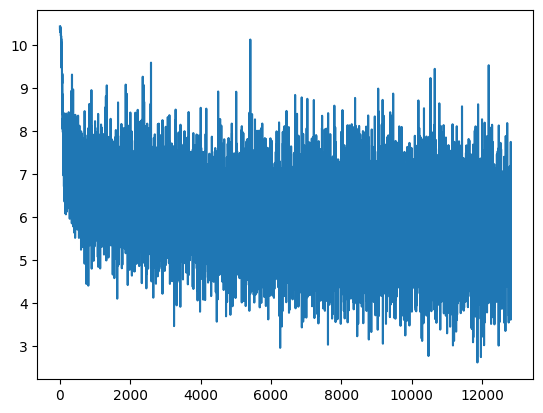

In [50]:
import matplotlib.pyplot as plt
plt.plot(loss_record)

In [ ]:
'''

for time_step in src_sentence:
  rnn(time_step)

'''

## Define Collate function
- After implementing Dataset, we have to declare DataLoader that groups several training samples as a single batch
- However, we cannot batchify the melodies in straightforward way, because the length of each melody is different
- In this problem, you will learn about how to handle sequences of different length as a batch


In [52]:
'''
To handle that problem, you have to make your collate function
'''
def your_collate_function(raw_batch):
  '''
  You can make your own function to handle the batch
  '''
  src = [x[0] for x in raw_batch]
  tgt = [x[1] for x in raw_batch]

  return src, tgt # This returns the first sample of each batch. So it will avoid the error, but it doesn't do proper batchifying

batch_size = 8
raw_batch = [trainset[i] for i in range(batch_size)] # This is the input for the collate function
batch = your_collate_function(raw_batch)

'''
This is what the 'collate_fn' does in DataLoader
'''

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, collate_fn=your_collate_function)
batch_by_loader = next(iter(train_loader))
batch_by_loader

([tensor([    2, 30329,  4416, 21091,  8488,    16,  3600, 12590,  4384, 27730,
          17247, 13085, 11828,  6854,    18,     3]),
  tensor([    2,  6674, 27025,  4387, 25610,  6487, 10866,  2625,  6505,  2215,
           4426,  4710,  7096,  6521, 14801, 21598,  3555,  8972,  2284, 10536,
           9822,  7819,  4346,  6411,  6425,    18,     3]),
  tensor([    2,  9978,  7122,  9794,  8321, 21739,  3252,  6646,  9670, 11571,
             18,     3]),
  tensor([    2,  2622, 10820, 17035,  4381, 13788,   145, 10696,    17,  4009,
           4339,    71,  4550,  4666,   146,  2517, 22704,  4456, 11551,  8569,
           2394,  4529,  6606,  7391,  7365, 11930,  4470, 17188,  4416, 26888,
             18,     3]),
  tensor([    2, 12066,  6589,    71,  4495,  6412,    27,  4719,  7162, 19311,
          28967,  2284,  7337,  8925,  4058,  4363,    25,  9071, 11067,  7841,
           8395, 18856,  4330, 19433, 10082,  8213,  4379,  6546, 10319, 27227,
           5102, 16104,  4146,  7

In [57]:
raw_batch = [trainset[i] for i in range(5)] # this is how the collate_fn of DataLoadeer gets input
src = [sample[0] for sample in raw_batch]
tgt = [sample[1] for sample in raw_batch]

src

[tensor([    2, 30329,  4416, 21091,  8488,    16,  3600, 12590,  4384, 27730,
         17247, 13085, 11828,  6854,    18,     3]),
 tensor([    2,  6674, 27025,  4387, 25610,  6487, 10866,  2625,  6505,  2215,
          4426,  4710,  7096,  6521, 14801, 21598,  3555,  8972,  2284, 10536,
          9822,  7819,  4346,  6411,  6425,    18,     3]),
 tensor([    2,  9978,  7122,  9794,  8321, 21739,  3252,  6646,  9670, 11571,
            18,     3]),
 tensor([    2,  2622, 10820, 17035,  4381, 13788,   145, 10696,    17,  4009,
          4339,    71,  4550,  4666,   146,  2517, 22704,  4456, 11551,  8569,
          2394,  4529,  6606,  7391,  7365, 11930,  4470, 17188,  4416, 26888,
            18,     3]),
 tensor([    2, 12066,  6589,    71,  4495,  6412,    27,  4719,  7162, 19311,
         28967,  2284,  7337,  8925,  4058,  4363,    25,  9071, 11067,  7841,
          8395, 18856,  4330, 19433, 10082,  8213,  4379,  6546, 10319, 27227,
          5102, 16104,  4146,  7549,  4469,  71

In [61]:
# pack this list of tensor
from torch.nn.utils.rnn import pack_sequence

pack_sequence(src, enforce_sorted=False)

PackedSequence(data=tensor([    2,     2,     2,     2,     2, 12066,  2622,  6674, 30329,  9978,
         6589, 10820, 27025,  4416,  7122,    71, 17035,  4387, 21091,  9794,
         4495,  4381, 25610,  8488,  8321,  6412, 13788,  6487,    16, 21739,
           27,   145, 10866,  3600,  3252,  4719, 10696,  2625, 12590,  6646,
         7162,    17,  6505,  4384,  9670, 19311,  4009,  2215, 27730, 11571,
        28967,  4339,  4426, 17247,    18,  2284,    71,  4710, 13085,     3,
         7337,  4550,  7096, 11828,  8925,  4666,  6521,  6854,  4058,   146,
        14801,    18,  4363,  2517, 21598,     3,    25, 22704,  3555,  9071,
         4456,  8972, 11067, 11551,  2284,  7841,  8569, 10536,  8395,  2394,
         9822, 18856,  4529,  7819,  4330,  6606,  4346, 19433,  7391,  6411,
        10082,  7365,  6425,  8213, 11930,    18,  4379,  4470,     3,  6546,
        17188, 10319,  4416, 27227, 26888,  5102,    18, 16104,     3,  4146,
         7549,  4469,  7148,    18,     3]),

In [65]:
def pack_collate(raw_batch):
  src = [sample[0] for sample in raw_batch]
  tgt = [sample[1] for sample in raw_batch]

  i_tgt = [x[:-1] for x in tgt]
  o_tgt = [x[1:] for x in tgt]

  return pack_sequence(src, enforce_sorted=False), pack_sequence(i_tgt, enforce_sorted=False), pack_sequence(o_tgt, enforce_sorted=False)


pack_collate(raw_batch)


(PackedSequence(data=tensor([    2,     2,     2,     2,     2, 12066,  2622,  6674, 30329,  9978,
          6589, 10820, 27025,  4416,  7122,    71, 17035,  4387, 21091,  9794,
          4495,  4381, 25610,  8488,  8321,  6412, 13788,  6487,    16, 21739,
            27,   145, 10866,  3600,  3252,  4719, 10696,  2625, 12590,  6646,
          7162,    17,  6505,  4384,  9670, 19311,  4009,  2215, 27730, 11571,
         28967,  4339,  4426, 17247,    18,  2284,    71,  4710, 13085,     3,
          7337,  4550,  7096, 11828,  8925,  4666,  6521,  6854,  4058,   146,
         14801,    18,  4363,  2517, 21598,     3,    25, 22704,  3555,  9071,
          4456,  8972, 11067, 11551,  2284,  7841,  8569, 10536,  8395,  2394,
          9822, 18856,  4529,  7819,  4330,  6606,  4346, 19433,  7391,  6411,
         10082,  7365,  6425,  8213, 11930,    18,  4379,  4470,     3,  6546,
         17188, 10319,  4416, 27227, 26888,  5102,    18, 16104,     3,  4146,
          7549,  4469,  7148,   

In [78]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, collate_fn=pack_collate)

src, i_tgt, o_tgt = next(iter(train_loader))
model.to(DEV)
model(src.to(DEV), i_tgt.to(DEV)).shape, o_tgt.data.shape

loss = get_nll(model(src.to(DEV), i_tgt.to(DEV)), o_tgt.data)
loss

tensor(10.3692, device='cuda:0', grad_fn=<MeanBackward0>)

In [79]:
from tqdm.auto import tqdm

model = Translator(tokenizer_src.vocab_size, tokenizer_tgt.vocab_size)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, collate_fn=pack_collate)

DEV = 'cuda'
model.to(DEV)

loss_record = []
for batch in tqdm(train_loader):
  src, i_tgt, o_tgt = batch
  logit = model(src.to(DEV), i_tgt.to(DEV))

  loss = get_nll(logit, o_tgt.data)

  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

  loss_record.append(loss.item())
  # break
# loss_record

  0%|          | 0/401 [00:00<?, ?it/s]

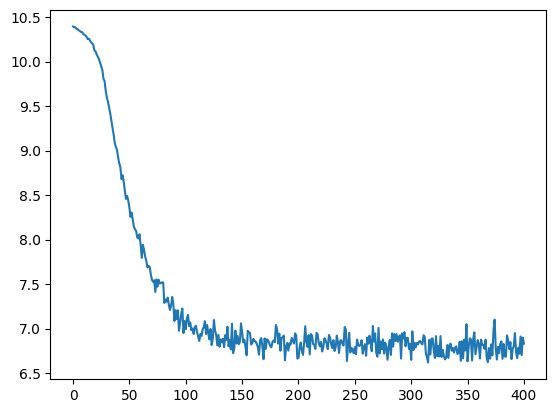

In [80]:
plt.plot(loss_record)

In [ ]:
raw_batch = [train_set[0], train_set[1], train_set[2]] # this is a sample input for collate function
raw_batch

[(tensor([    2,  7110,  7249,  6455, 14377, 18637, 15237,  8251, 25509,  4337,
          18905, 13630,  9107,  9135,    18,     3]),
  tensor([    2,  1287,  1109, 13814,  1042,  1065,  4666,  1061,    69,  1434,
             17,  2323,  8814,  1562,  1169, 18279,  2481,  1061,  4393,  2032,
             18]),
  tensor([ 1287,  1109, 13814,  1042,  1065,  4666,  1061,    69,  1434,    17,
           2323,  8814,  1562,  1169, 18279,  2481,  1061,  4393,  2032,    18,
              3])),
 (tensor([    2,  6832,  9081, 15420, 27164, 11105, 17601,  6412,  3160,  3252,
           6414,    18,     3]),
  tensor([   2, 1089,   11,   87, 1161, 1863, 1042, 1652, 1089, 7485, 1693, 1287,
          1195, 2834, 1089, 1039, 1023, 1521,   18]),
  tensor([1089,   11,   87, 1161, 1863, 1042, 1652, 1089, 7485, 1693, 1287, 1195,
          2834, 1089, 1039, 1023, 1521,   18,    3])),
 (tensor([    2,  3600,  6741, 12614,  6678, 28240,  3191,  4657,  4336, 12553,
          15888,    18,     3]),
  tensor

In [ ]:
batch_by_loader # [train_set[0], train_set[1], train_set[2]]

[(tensor([    2,  7110,  7249,  6455, 14377, 18637, 15237,  8251, 25509,  4337,
          18905, 13630,  9107,  9135,    18,     3]),
  tensor([    2,  1287,  1109, 13814,  1042,  1065,  4666,  1061,    69,  1434,
             17,  2323,  8814,  1562,  1169, 18279,  2481,  1061,  4393,  2032,
             18]),
  tensor([ 1287,  1109, 13814,  1042,  1065,  4666,  1061,    69,  1434,    17,
           2323,  8814,  1562,  1169, 18279,  2481,  1061,  4393,  2032,    18,
              3])),
 (tensor([    2,  6832,  9081, 15420, 27164, 11105, 17601,  6412,  3160,  3252,
           6414,    18,     3]),
  tensor([   2, 1089,   11,   87, 1161, 1863, 1042, 1652, 1089, 7485, 1693, 1287,
          1195, 2834, 1089, 1039, 1023, 1521,   18]),
  tensor([1089,   11,   87, 1161, 1863, 1042, 1652, 1089, 7485, 1693, 1287, 1195,
          2834, 1089, 1039, 1023, 1521,   18,    3])),
 (tensor([    2,  3600,  6741, 12614,  6678, 28240,  3191,  4657,  4336, 12553,
          15888,    18,     3]),
  tensor

#### Pad Sequence and Pack Sequence
In PyTorch, there are two ways to batchify a group of sequence with different length.
- `torch.nn.utils.rnn.pad_sequence`
    - This function takes list of tensors with different length and return padded sequence
    - Padding is adding some constant number as a PAD token to match the length of short sequence to the maximum length
        - e.g. If there are sequence of length (3,7,4), we can add 4 zeros to sequence with length 3, 3 zeros to sequence with length 4 to make them length 7
    - In default, we use 0 for padding (zero padding)
    - The result
- `torch.nn.utils.rnn.pack_sequence`
    - pad_sequence

Cells below show the example of `pad_sequence`

In [ ]:
from torch.nn.utils.rnn import pad_sequence, pack_sequence, PackedSequence
short = torch.arange(3, -1, -1).float() # [3, 2, 1, 0]
long = torch.arange(27,19, -1).float()
middle = torch.arange(15,9, -1).float()

pad_sequence([short, long, middle], batch_first=False)  # T x N

tensor([[ 3., 27., 15.],
        [ 2., 26., 14.],
        [ 1., 25., 13.],
        [ 0., 24., 12.],
        [ 0., 23., 11.],
        [ 0., 22., 10.],
        [ 0., 21.,  0.],
        [ 0., 20.,  0.]])

In [ ]:
# Default value of batch_first in pad_sequence is False.
# So you have to always be careful not to miss batch_first=True in pad_sequence, if you use batch_first=True for your RNN layer.
pad_sequence([short, long, middle], batch_first=True)  # N x T

tensor([[ 3.,  2.,  1.,  0.,  0.,  0.,  0.,  0.],
        [27., 26., 25., 24., 23., 22., 21., 20.],
        [15., 14., 13., 12., 11., 10.,  0.,  0.]])

1) However, the problem is that you can't figure out whether the 0 at the end of each sequence is a padded one, or was included in the original sequence
- e.g. `[2, 3, 4, 3, 0]` becomes `[ 2,  3,  4,  5,  0,  0,  0]`. Now we don't know how many zeros were added for padding

2) Also, if you run RNN for this padded sequence, RNN will calculate for the padded part also.
- RNN doesn't know whether it is padded data, or existing data
- This makes computation slower

3) If you want to use bi-directional, which also reads the sequence from backward, paddings can make the result different.

To solve this issue, we use PackedSequence, by using `pack_sequence`/

In [ ]:
packed_sequence = pack_sequence([short, long, middle], enforce_sorted=False)
packed_sequence

PackedSequence(data=tensor([27., 15.,  3., 26., 14.,  2., 25., 13.,  1., 24., 12.,  0., 23., 11.,
        22., 10., 21., 20.]), batch_sizes=tensor([3, 3, 3, 3, 2, 2, 1, 1]), sorted_indices=tensor([1, 2, 0]), unsorted_indices=tensor([2, 0, 1]))

`PackedSequence` has `data` and `batch_sizes`
- `data` contains the flattened value of given batch
    - To optimize the computation, the sequences have to be sorted by descending of length
- `batch_sizes` represents how many valid batch sample exists for each time step
    - `[3, 3, 3, 2, 2, 1, 1]` means that there are 3 sequences for first three time steps, and then 2 sequences for next two steps, and then only 1 sequence for next two steps.
- `sorted_indices` shows how the sorted sequences can be converted to original order.
    - `[1,2,0]` means that
        - the 0th sequence in the sorted sequences (the longest one) was indexed as 1 in the original input batch
        - the 1st sequence in the sorted sequences (`middle`) was indexed as 2 in the original input batch
        - the 2nd sequence in the sorted sequences (`short`) was index as 0 in the original input batch
- `unsorted_indices` shows how the original sequences are sorted.
    - `[2,0,1]` means that
        - the 0th sequence in the original input was sorted as 2nd in the sorted sequences

In [ ]:
rnn_layer = nn.GRU(1, 1)
packed_sequence = pack_sequence([short.unsqueeze(1), long.unsqueeze(1), middle.unsqueeze(1)], enforce_sorted=False)
out, last_hidden = rnn_layer(packed_sequence)

print(f"Type of output of RNN for PackedSequence: {type(out)}")
print(f"Type of last_hidden of RNN for PackedSequence: {type(last_hidden)}")

Type of output of RNN for PackedSequence: <class 'torch.nn.utils.rnn.PackedSequence'>
Type of last_hidden of RNN for PackedSequence: <class 'torch.Tensor'>


- RNN or its family of PyTorch can automatically handle `PackedSequence`
- However, other layers like `nn.Embedding` or `nn.Linear` cannot take `PackedSequence` as its input
- There are two ways to feed `PackedSequence` to these layers
    - First, convert PackedSequence to ordinary torch.Tensor by `torch.nn.utils.rnn.pad_packed_sequence`
        - This will convert PackedSequence to a tensor of sequneces with same length but different padding
    - The other way is to feed only PackedSequence.data, and then declaring new PackedSequence with the output as `data`

In [ ]:
packed_sequence

PackedSequence(data=tensor([[27.],
        [15.],
        [ 3.],
        [26.],
        [14.],
        [ 2.],
        [25.],
        [13.],
        [ 1.],
        [24.],
        [12.],
        [ 0.],
        [23.],
        [11.],
        [22.],
        [10.],
        [21.],
        [20.]]), batch_sizes=tensor([3, 3, 3, 3, 2, 2, 1, 1]), sorted_indices=tensor([1, 2, 0]), unsorted_indices=tensor([2, 0, 1]))

In [ ]:
'''
This will make error, because other layers cannot handle PackedSequence
'''
test_linear_layer = nn.Linear(in_features=1, out_features=2)
test_linear_layer(packed_sequence)

TypeError: ignored

In [ ]:
'''
One way to to this is using torch.nn.utils.rnn.pad_packed_sequence to convert PackedSequence to ordinary padded tensor
'''

from torch.nn.utils.rnn import pad_packed_sequence
padded_sequence, batch_lengths = pad_packed_sequence(packed_sequence)
print(f'The padded sequence generated from packed sequence (squeezed for printing): \n {padded_sequence.squeeze()}')
print(f'"pad_packed_sequence" also returns "batch_lengths", to clarify the original length before the padding: \n {batch_lengths}')



The padded sequence generated from packed sequence (squeezed for printing): 
 tensor([[ 3., 27., 15.],
        [ 2., 26., 14.],
        [ 1., 25., 13.],
        [ 0., 24., 12.],
        [ 0., 23., 11.],
        [ 0., 22., 10.],
        [ 0., 21.,  0.],
        [ 0., 20.,  0.]])
"pad_packed_sequence" also returns "batch_lengths", to clarify the original length before the padding: 
 tensor([4, 8, 6])


In [ ]:
'''
Now you can feed padded sequence to linear layer.
'''

linear_output = test_linear_layer(padded_sequence)
print(f"Output of feeding padded_sequence to a linear layer: {linear_output}")
print("Caution that it returns non-zero values for timestep with zero padding, because linear layer has a bias")

Output of feeding padded_sequence to a linear layer: tensor([[[ 3.3898,  1.8743],
         [24.5948, 12.2365],
         [13.9923,  7.0554]],

        [[ 2.5063,  1.4426],
         [23.7113, 11.8048],
         [13.1088,  6.6237]],

        [[ 1.6227,  1.0108],
         [22.8277, 11.3730],
         [12.2252,  6.1919]],

        [[ 0.7392,  0.5791],
         [21.9442, 10.9413],
         [11.3417,  5.7602]],

        [[ 0.7392,  0.5791],
         [21.0606, 10.5095],
         [10.4581,  5.3284]],

        [[ 0.7392,  0.5791],
         [20.1771, 10.0777],
         [ 9.5746,  4.8966]],

        [[ 0.7392,  0.5791],
         [19.2936,  9.6460],
         [ 0.7392,  0.5791]],

        [[ 0.7392,  0.5791],
         [18.4100,  9.2142],
         [ 0.7392,  0.5791]]], grad_fn=<ViewBackward0>)
Caution that it returns non-zero values for timestep with zero padding, because linear layer has a bias


In [ ]:
'''
You can make the output as a PackedSequence, by using torch.nn.utils.rnn.pack_padded_sequence
'''
from torch.nn.utils.rnn import pack_padded_sequence
re_packed_sequence = pack_padded_sequence(linear_output, batch_lengths, enforce_sorted=False)
re_packed_sequence

PackedSequence(data=tensor([[24.5948, 12.2365],
        [13.9923,  7.0554],
        [ 3.3898,  1.8743],
        [23.7113, 11.8048],
        [13.1088,  6.6237],
        [ 2.5063,  1.4426],
        [22.8277, 11.3730],
        [12.2252,  6.1919],
        [ 1.6227,  1.0108],
        [21.9442, 10.9413],
        [11.3417,  5.7602],
        [ 0.7392,  0.5791],
        [21.0606, 10.5095],
        [10.4581,  5.3284],
        [20.1771, 10.0777],
        [ 9.5746,  4.8966],
        [19.2936,  9.6460],
        [18.4100,  9.2142]], grad_fn=<PackPaddedSequenceBackward0>), batch_sizes=tensor([3, 3, 3, 3, 2, 2, 1, 1]), sorted_indices=tensor([1, 2, 0]), unsorted_indices=tensor([2, 0, 1]))

In [ ]:
'''
Another way to do it is using PackedSequence.data
'''

linear_out_pack = test_linear_layer(packed_sequence.data)
packed_sequence_after_linear = PackedSequence(linear_out_pack, packed_sequence.batch_sizes, packed_sequence.sorted_indices, packed_sequence.unsorted_indices)
packed_sequence_after_linear

PackedSequence(data=tensor([[24.5948, 12.2365],
        [13.9923,  7.0554],
        [ 3.3898,  1.8743],
        [23.7113, 11.8048],
        [13.1088,  6.6237],
        [ 2.5063,  1.4426],
        [22.8277, 11.3730],
        [12.2252,  6.1919],
        [ 1.6227,  1.0108],
        [21.9442, 10.9413],
        [11.3417,  5.7602],
        [ 0.7392,  0.5791],
        [21.0606, 10.5095],
        [10.4581,  5.3284],
        [20.1771, 10.0777],
        [ 9.5746,  4.8966],
        [19.2936,  9.6460],
        [18.4100,  9.2142]], grad_fn=<AddmmBackward0>), batch_sizes=tensor([3, 3, 3, 3, 2, 2, 1, 1]), sorted_indices=tensor([1, 2, 0]), unsorted_indices=tensor([2, 0, 1]))

In [ ]:
from torch.nn.utils.rnn import pack_sequence, PackedSequence

def pack_collate(raw_batch):
  source, target, shifted_target = zip(*raw_batch)
  return pack_sequence(source, enforce_sorted=False), pack_sequence(target, enforce_sorted=False), pack_sequence(shifted_target, enforce_sorted=False)

train_loader = DataLoader(train_set, batch_size=32, collate_fn=pack_collate)
batch = next(iter(train_loader))
batch

NameError: ignored

In [ ]:
src, tgt, shifted_tgt = batch
src.sorted_indices, tgt.sorted_indices

(tensor([21, 17, 14,  5, 27,  8, 24, 28,  3,  9, 13, 29,  4, 16,  0, 19, 22,  2,
         10, 20, 25, 23, 31, 15,  7, 18, 11, 12, 26, 30,  1,  6]),
 tensor([21,  5, 24, 13,  3, 17,  8,  4, 14, 16, 28, 27, 29,  0, 19,  9,  2, 22,
         25, 20, 18, 23, 31, 11, 10,  7, 30, 15,  1, 12, 26,  6]))

## Define Model
![image](https://raw.githubusercontent.com/tensorflow/nmt/master/nmt/g3doc/img/seq2seq.jpg)

In [ ]:
import torch.nn as nn
class Seq2seq(nn.Module):
  def __init__(self, enc_vocab, dec_vocab, hidden_size, num_layers=2):
    super().__init__()
    self.encoder = Encoder(enc_vocab, hidden_size, num_layers=num_layers)
    self.decoder = Decoder(dec_vocab, hidden_size, num_layers=num_layers)

  def forward(self, src, tgt):
    enc_out = self.encoder(src)
    # if isinstance(src, PackedSequence) and isinstance(tgt, PackedSequence):
    #   enc_out = enc_out[:, src.unsorted_indices][:, tgt.sorted_indices ]
    dec_out = self.decoder(tgt, enc_out)
    return dec_out

class Encoder(nn.Module):
  def __init__(self, num_vocab, hidden_size, num_layers=2):
    super().__init__()
    self.emb = nn.Embedding(num_vocab, hidden_size)
    self.rnn = nn.GRU(hidden_size, hidden_size, batch_first=True, num_layers=num_layers)
    # batch_first True: it takes (Num_samples_in_batch, num_timesteps, num_dim)
    # batch_first False: it takes (num_timesteps, Num_samples_in_batch, num_dim)

  def forward(self, x):
    if isinstance(x, PackedSequence):
      emb = PackedSequence(self.emb(x.data), batch_sizes=x.batch_sizes, sorted_indices=x.sorted_indices, unsorted_indices=x.unsorted_indices)
    else:
      emb = self.emb(x)
    out, last_hidden = self.rnn(emb)
    # Even though input is PackedSequence, last_hidden is always tensor
    # in "unsorted_order"
    # last_hidden[:, 0] means 0th sample in the raw (unsorted) batch
    return last_hidden


class Decoder(nn.Module):
  def __init__(self, num_vocab, hidden_size, num_layers=2):
    super().__init__()
    self.emb = nn.Embedding(num_vocab, hidden_size)
    self.rnn = nn.GRU(hidden_size, hidden_size, batch_first=True, num_layers=num_layers)
    self.proj = nn.Linear(hidden_size, num_vocab)


  def forward(self, x, enc_output):
    if isinstance(x, PackedSequence):
      emb = PackedSequence(self.emb(x.data), batch_sizes=x.batch_sizes, sorted_indices=x.sorted_indices, unsorted_indices=x.unsorted_indices)
      out, last_hidden = self.rnn(emb, enc_output)
      # You have to feed last_hidden to rnn following unsorted_indices
      # when you feed PackedSequence input to RNN.
      logit = PackedSequence(self.proj(out.data), batch_sizes=out.batch_sizes, sorted_indices=out.sorted_indices, unsorted_indices=out.unsorted_indices)
    else:
      emb = self.emb(x)
      out, last_hidden = self.rnn(emb, enc_output)
      logit = self.proj(out)
    return logit

hidden_size = 64
model = Seq2seq(tokenizer_src.vocab_size, tokenizer_tgt.vocab_size, hidden_size)
encoder = Encoder(tokenizer_src.vocab_size, hidden_size)
decoder = Decoder(tokenizer_tgt.vocab_size, hidden_size)

src, tgt, shifted_tgt = batch

enc_out = encoder(src)
dec_out = decoder(tgt, enc_out)

logit = model(src, tgt)
# logit.shape, logit.softmax(dim=-1)

NameError: ignored

In [ ]:
unsorted_enc_out = enc_out[:, src.unsorted_indices]
target_sorted_enc_out = unsorted_enc_out[:, tgt.sorted_indices]

In [ ]:
logit

PackedSequence(data=tensor([[-0.1037,  0.1473,  0.0048,  ..., -0.0047, -0.1110, -0.0725],
        [-0.1180,  0.1796,  0.0051,  ..., -0.0034, -0.1301, -0.0628],
        [-0.1426,  0.1752,  0.0121,  ..., -0.0245, -0.0783, -0.0516],
        ...,
        [ 0.0704,  0.0287,  0.0330,  ...,  0.0372, -0.1235,  0.0724],
        [ 0.0297,  0.0548, -0.0590,  ..., -0.0222, -0.1012,  0.0353],
        [ 0.0028,  0.0724, -0.0668,  ...,  0.0017, -0.0646,  0.0580]],
       grad_fn=<AddmmBackward0>), batch_sizes=tensor([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), sorted_indices=tensor([5, 3, 4, 0, 2, 7, 1, 6]), unsorted_indices=tensor([3, 6, 4, 1, 2, 0, 7, 5]))

In [ ]:
logit.shape, shifted_tgt.shape, shifted_tgt

(torch.Size([1, 10, 30679]),
 torch.Size([1, 10]),
 tensor([[  76,   10,  746,  810,  906,  335,  412, 2590,   17,    3]]))

In [ ]:
def nll_loss(pred, target, eps=1e-8):
  if pred.ndim == 3:
    pred = pred.flatten(0, 1)
  if target.ndim == 2:
    target = target.flatten(0, 1)
  assert pred.ndim == 2
  assert target.ndim == 1


  return -torch.log(pred[torch.arange(len(target)), target] + eps).mean()

# loss = nll_loss(logit.softmax(dim=-1), shifted_tgt)
# loss, loss.shape, shifted_tgt

## Define Trainer

In [ ]:
from tqdm.auto import tqdm

class Trainer:
  def __init__(self, model, optimizer, loss_fn, train_loader, valid_loader, device):
    self.model = model
    self.optimizer = optimizer
    self.loss_fn = loss_fn
    self.train_loader = train_loader
    self.valid_loader = valid_loader

    self.model.to(device)

    self.best_valid_accuracy = 0
    self.device = device

    self.training_loss = []
    self.validation_loss = []
    self.validation_acc = []

  def save_model(self, path='kor_eng_translator_model.pt'):
    torch.save({'model':self.model.state_dict(), 'optim':self.optimizer.state_dict()}, path)

  def train_by_num_epoch(self, num_epochs):
    for epoch in tqdm(range(num_epochs)):
      self.model.train()
      for batch in tqdm(self.train_loader, leave=False):
        loss_value = self._train_by_single_batch(batch)
        self.training_loss.append(loss_value)
      self.model.eval()
      validation_loss, validation_acc = self.validate()
      self.validation_loss.append(validation_loss)
      self.validation_acc.append(validation_acc)

      if validation_acc > self.best_valid_accuracy:
        print(f"Saving the model with best validation accuracy: Epoch {epoch+1}, Acc: {validation_acc:.4f} ")
        self.save_model('kor_eng_translator_model_best.pt')
      else:
        self.save_model('kor_eng_translator_model_last.pt')
      self.best_valid_accuracy = max(validation_acc, self.best_valid_accuracy)


  def _train_by_single_batch(self, batch):
    '''
    This method updates self.model's parameter with a given batch

    batch (tuple): (batch_of_input_text, batch_of_label)

    You have to use variables below:

    self.model (SentimentModel/torch.nn.Module): A neural network model
    self.optimizer (torch.optim.adam.Adam): Adam optimizer that optimizes model's parameter
    self.loss_fn (function): function for calculating BCE loss for a given prediction and target
    self.device (str): 'cuda' or 'cpu'

    output: loss (float): Mean binary cross entropy value for every sample in the training batch
    The model's parameters, optimizer's steps has to be updated inside this method

    TODO: Complete this method
    '''
    src, tgt, shifted_tgt = batch
    src = src.to(self.device)
    tgt = tgt.to(self.device)
    shifted_tgt = shifted_tgt.to(self.device)

    logit = self.model(src, tgt)

    if isinstance(logit, PackedSequence):
      prob = logit.data.softmax(dim=-1)
      loss = self.loss_fn(prob, shifted_tgt.data)
    else:
      loss = self.loss_fn(prob, shifted_tgt)
    loss.backward()
    self.optimizer.step()
    self.optimizer.zero_grad()

    return loss.item()


  def validate(self, external_loader=None):
    '''
    This method calculates accuracy and loss for given data loader.
    It can be used for validation step, or to get test set result

    input:
      data_loader: If there is no data_loader given, use self.valid_loader as default.


    output:
      validation_loss (float): Mean Binary Cross Entropy value for every sample in validation set
      validation_accuracy (float): Mean Accuracy value for every sample in validation set

    TODO: Complete this method

    '''

    ### Don't change this part
    if external_loader and isinstance(external_loader, DataLoader):
      loader = external_loader
      print('An arbitrary loader is used instead of Validation loader')
    else:
      loader = self.valid_loader

    self.model.eval()

    '''
    Write your code from here, using loader, self.model, self.loss_fn.
    '''

hidden_size = 128
model = Seq2seq(tokenizer_src.vocab_size, tokenizer_tgt.vocab_size, hidden_size)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nll_loss
train_loader = DataLoader(train_set, batch_size=64, shuffle=True, collate_fn=pack_collate)
valid_loader = DataLoader(valid_set, batch_size=128, shuffle=False, collate_fn=pack_collate)
device = 'cuda'

trainer = Trainer(model, optimizer, loss_fn, train_loader, valid_loader, device)


In [ ]:
loss_records = []

for i in range(100):
  loss = trainer._train_by_single_batch(batch)
  loss_records.append(loss)
print(loss_records)

[10.359963417053223, 10.313287734985352, 10.263622283935547, 10.206441879272461, 10.136489868164062, 10.047164916992188, 9.930057525634766, 9.775178909301758, 9.572907447814941, 9.3184232711792, 9.017634391784668, 8.689282417297363, 8.35786247253418, 8.042617797851562, 7.753167629241943, 7.492118835449219, 7.258220672607422, 7.048532962799072, 6.860129356384277, 6.690823554992676, 6.539017677307129, 6.403351306915283, 6.282470703125, 6.174984931945801, 6.079526901245117, 5.994827747344971, 5.9197821617126465, 5.853461742401123, 5.795093536376953, 5.744019031524658, 5.699643611907959, 5.661417484283447, 5.628849506378174, 5.601459503173828, 5.578672409057617, 5.559847354888916, 5.544384956359863, 5.531750679016113, 5.521424770355225, 5.512904167175293, 5.5057172775268555, 5.49946403503418, 5.4938130378723145, 5.488489151000977, 5.483280181884766, 5.478091239929199, 5.47297477722168, 5.468082904815674, 5.463491439819336, 5.458996295928955, 5.4544267654418945, 5.449832916259766, 5.4453296

In [ ]:
trainer.train_by_num_epoch(1)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/160000 [00:00<?, ?it/s]

- You can download pre-trained weight

In [ ]:
# !gdown 127OoPv8-lF5TWeNCq9PNa8igyGQnR-Pe
!gdown 15jL2TaRk6Q47uuPWDruUge6O_gCPv5mp

Downloading...
From: https://drive.google.com/uc?id=15jL2TaRk6Q47uuPWDruUge6O_gCPv5mp
To: /content/kor_eng_translator_model_vanilla_best.pt
100% 704M/704M [00:09<00:00, 78.0MB/s]


In [ ]:
import torch

In [ ]:
state_dict = torch.load("kor_eng_translator_model_vanilla_best.pt")

In [ ]:
hidden_size = 512
model = Seq2seq(tokenizer_src.vocab_size, tokenizer_tgt.vocab_size, hidden_size, num_layers=3)

model.load_state_dict(state_dict['model'])

<All keys matched successfully>

In [ ]:
class Translator:
  def __init__(self, model, src_tokenizer, tgt_tokenizer):
    self.model = model
    self.src_tokenizer = src_tokenizer
    self.tgt_tokenizer = tgt_tokenizer

    self.model.eval()
    self.model.cpu()

    self.start_token_idx = 2
    self.end_token_idx = 3

  def __call__(self, astr):
    encoded_tokens = self.src_tokenizer.encode(astr)
    encoded_tokens = torch.tensor(encoded_tokens, dtype=torch.long)

    # run models encoder to get encoder out
    enc_out = model.encoder(encoded_tokens)
    # run decoder one-by-one
    current_token = torch.tensor([self.start_token_idx]) # start of the sentence token
    prev_hidden = enc_out
    outputs = []
    for i in range(50):
      emb = self.model.decoder.emb(current_token)
      dec_out, cur_hidden = self.model.decoder.rnn(emb, prev_hidden)
      logit = self.model.decoder.proj(dec_out)
      selected_token_idx = torch.argmax(logit, dim=-1)

      # check the generated token is <end> token
      if selected_token_idx.squeeze().item() == self.end_token_idx:
        break

      # update information
      current_token = selected_token_idx
      prev_hidden = cur_hidden
      outputs.append(current_token.item())

    return self.tgt_tokenizer.decode(outputs)

translator = Translator(model, tokenizer_src, tokenizer_tgt)
translator('이 모델은 한국어 문장을 영어로 번역합니다')

'this model is translated into korean in english.'

In [ ]:
tokenizer_src.encode('나는 수업을 듣고 있습니다')

[2, 6481, 10499, 9414, 6507, 3]